# Importing Relevant Libraries

In [111]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

# Discover the data

In [112]:
data = pd.read_csv('Nutrition__Physical_Activity__and_Obesity.csv')
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [113]:
data.describe(include = 'all')

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
count,88629.000000,88629.000000,88629,88629,88629,88629,88629,88629,0.0,88629,...,86977,88629,88629,88629,88629,88629.000000,88620,88620,88620,88620
unique,NaN,NaN,55,55,1,3,3,9,NaN,1,...,105,3,3,9,1,NaN,6,28,6,28
top,NaN,NaN,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q036,VALUE,NaN,Race/Ethnicity,Hispanic,RACE,RACEHIS
freq,NaN,NaN,1652,1652,88629,46345,46345,16577,NaN,88629,...,1232,46345,46345,16577,88629,NaN,25320,3165,25320,3165
mean,2016.011362,2016.011362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.906475,NaN,NaN,NaN,NaN
std,3.121080,3.121080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.485456,NaN,NaN,NaN,NaN
min,2011.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2013.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2016.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,2019.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


# Clean The DataSet

In [114]:
data.drop(['YearEnd', 'Data_Value_Unit'], axis = 1, inplace = True)
data.head()

,YearStart,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,30.6,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,29.3,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.8,28.8,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.7,32.7,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,Value,26.6,26.6,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [115]:
data.isnull().sum()

YearStart                         0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Type                   0
Data_Value                     8778
Data_Value_Alt                 8778
Data_Value_Footnote_Symbol    79851
Data_Value_Footnote           79851
Low_Confidence_Limit           8778
High_Confidence_Limit          8778
Sample_Size                    8778
Total                         85464
Age(years)                    69639
Education                     75969
Gender                        82299
Income                        66474
Race/Ethnicity                63309
GeoLocation                    1652
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
LocationID                        0
StratificationCategory1     

In [116]:
datanew = data.dropna(subset = ['GeoLocation', 'Sample_Size', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Data_Value', 'Data_Value_Alt'])
datanew.drop(['Class','Datasource','LocationAbbr','Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Total','Age(years)', 'Education', 'Gender','Income','Race/Ethnicity'], axis = 1, inplace = True)
datanew.isnull().sum()

C:\Users\Haris Rehman\AppData\Local\Temp\ipykernel_127220\3593229880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew.drop(['Class','Datasource','LocationAbbr','Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Total','Age(years)', 'Education', 'Gender','Income','Race/Ethnicity'], axis = 1, inplace = True)


YearStart                    0
LocationDesc                 0
Topic                        0
Question                     0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
GeoLocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
dtype: int64

In [117]:
datanew.describe(include = 'all')

,YearStart,LocationDesc,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
count,78199.000000,78199,78199,78199,78199,78199.000000,78199.000000,78199.000000,78199.000000,78199.000000,78199,78199,78199,78199,78199,78199.000000,78199,78199,78199,78199
unique,NaN,54,3,9,1,NaN,NaN,NaN,NaN,NaN,105,3,3,9,1,NaN,6,28,6,28
top,NaN,Washington,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,NaN,NaN,NaN,NaN,NaN,"(47.522278629, -120.47001079)",PA,PA1,Q047,VALUE,NaN,Income,High school graduate,INC,EDUHSGRAD
freq,NaN,1614,40916,14676,78199,NaN,NaN,NaN,NaN,NaN,1063,40916,40916,14676,78199,NaN,21618,3089,21618,3089
mean,2015.995384,NaN,NaN,NaN,NaN,31.235915,31.235915,26.839646,36.214073,1877.566823,NaN,NaN,NaN,NaN,NaN,29.991215,NaN,NaN,NaN,NaN
std,3.127726,NaN,NaN,NaN,NaN,10.135005,10.135005,9.915199,11.083315,2382.270921,NaN,NaN,NaN,NaN,NaN,16.863272,NaN,NaN,NaN,NaN
min,2011.000000,NaN,NaN,NaN,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,24.300000,24.300000,19.900000,28.700000,505.000000,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2016.000000,NaN,NaN,NaN,NaN,31.200000,31.200000,26.700000,36.000000,1076.000000,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,37.000000,37.000000,32.800000,42.300000,2283.500000,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,NaN,NaN


In [118]:
datanew.reset_index(drop = True, inplace= True)
datanew.head()

,YearStart,LocationDesc,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,Guam,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,29.3,25.7,33.3,842.0,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
1,2015,Guam,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Value,27.4,27.4,18.6,38.5,125.0,"(13.444304, 144.793731)",PA,PA1,Q044,VALUE,66,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2012,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,48.5,48.5,32.3,64.9,69.0,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
3,2012,District of Columbia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.6,31.6,24.0,40.4,243.0,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
4,2015,Puerto Rico,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,38.1,38.1,32.6,43.8,421.0,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$25,000 - $34,999",INC,INC2535


# Explore Probability Density Functions

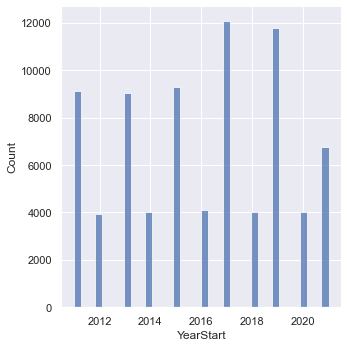

In [119]:
sns.displot(datanew['YearStart'])

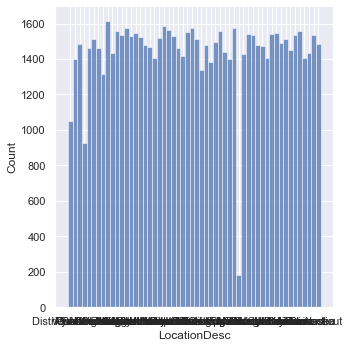

In [120]:
sns.displot(datanew['LocationDesc'])

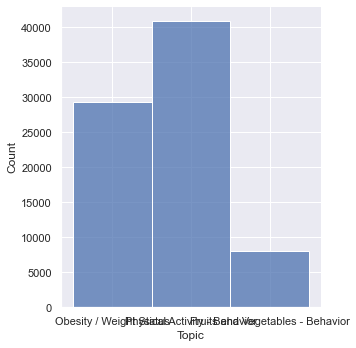

In [121]:
sns.displot(datanew['Topic'])

d:\PYTHON\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


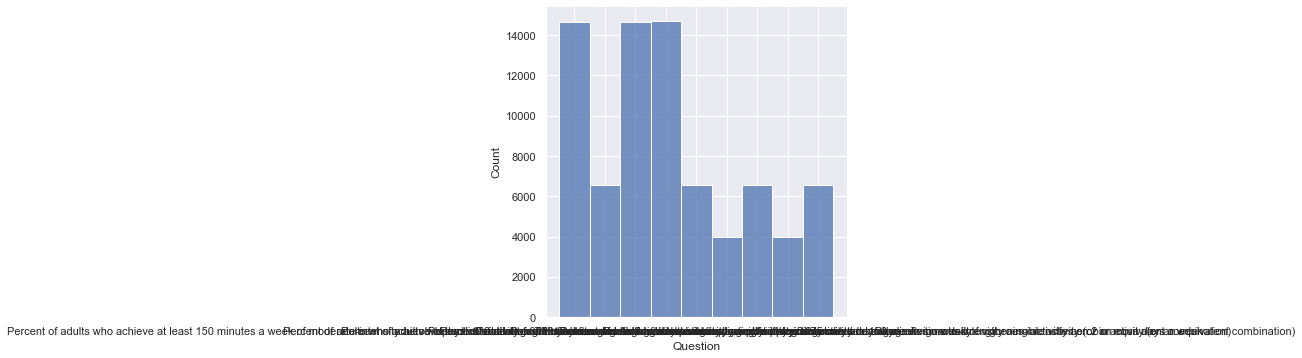

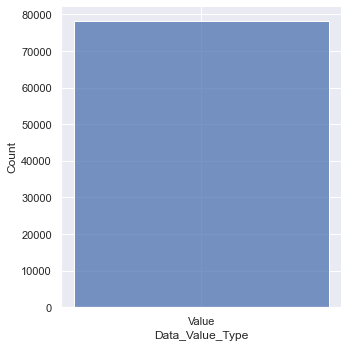

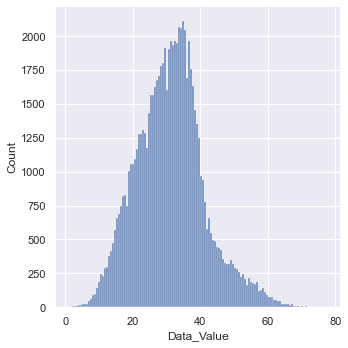

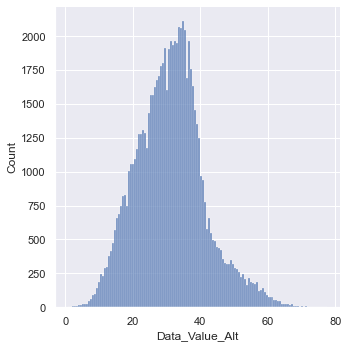

In [122]:
sns.displot(datanew['Question'])
sns.displot(datanew['Data_Value_Type'])
sns.displot(datanew['Data_Value'])
sns.displot(datanew['Data_Value_Alt'])

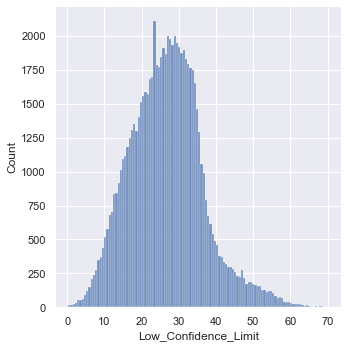

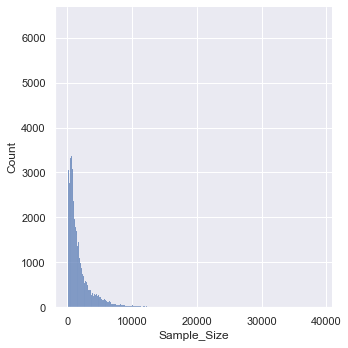

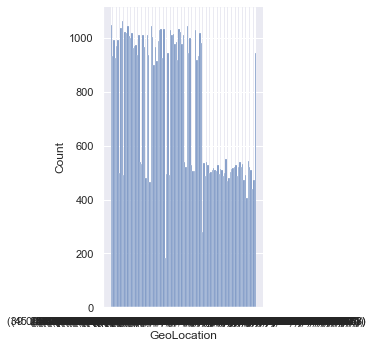

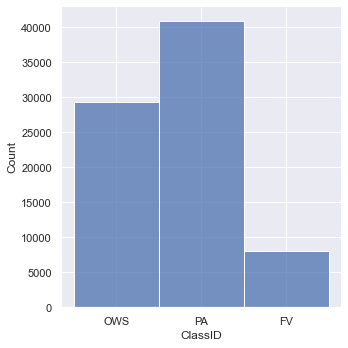

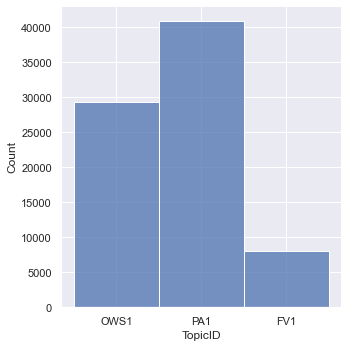

In [123]:
sns.displot(datanew['Low_Confidence_Limit'])
sns.displot(datanew['Sample_Size'])
sns.displot(datanew['GeoLocation'])
sns.displot(datanew['ClassID'])
sns.displot(datanew['TopicID'])

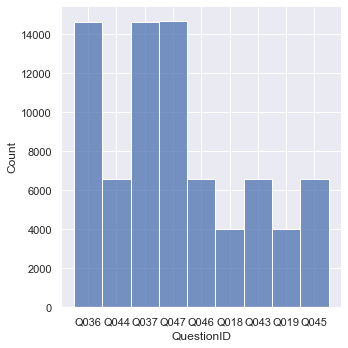

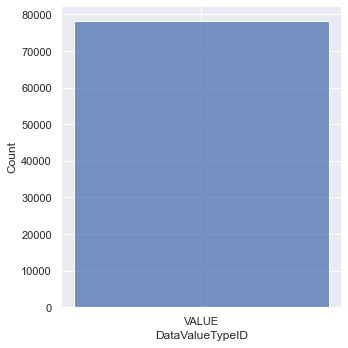

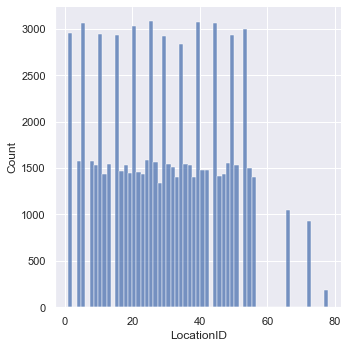

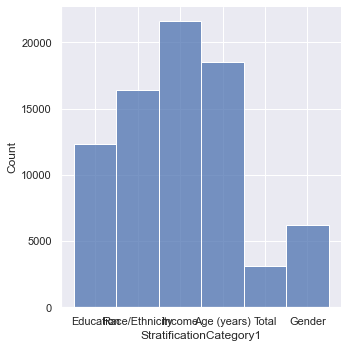

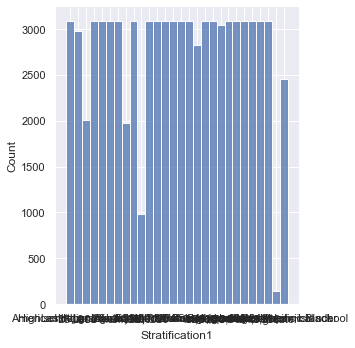

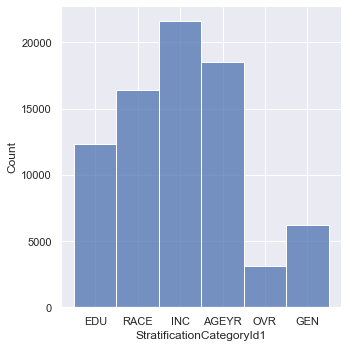

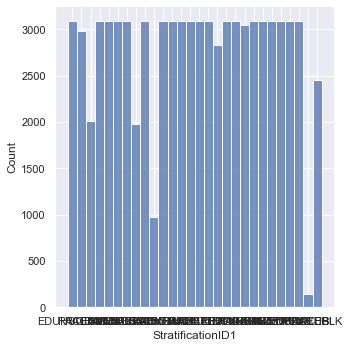

In [124]:
sns.displot(datanew['QuestionID'])
sns.displot(datanew['DataValueTypeID'])
sns.displot(datanew['LocationID'])
sns.displot(datanew['StratificationCategory1'])
sns.displot(datanew['Stratification1'])
sns.displot(datanew['StratificationCategoryId1'])
sns.displot(datanew['StratificationID1'])

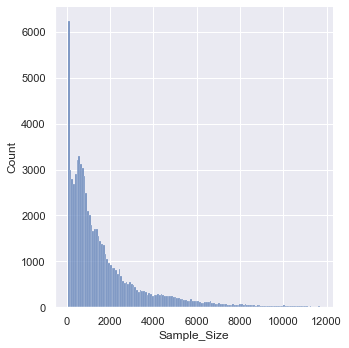

In [125]:
q = datanew['Sample_Size'].quantile(0.99) 
datanew = datanew[datanew['Sample_Size']<q]
sns.displot(datanew['Sample_Size'])

In [126]:
datanew.reset_index(drop = True, inplace = True)
datanew.describe(include = 'all')

,YearStart,LocationDesc,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
count,77417.000000,77417,77417,77417,77417,77417.000000,77417.000000,77417.000000,77417.000000,77417.000000,77417,77417,77417,77417,77417,77417.000000,77417,77417,77417,77417
unique,NaN,54,3,9,1,NaN,NaN,NaN,NaN,NaN,105,3,3,9,1,NaN,6,28,6,28
top,NaN,California,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,NaN,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",PA,PA1,Q047,VALUE,NaN,Income,High school graduate,INC,EDUHSGRAD
freq,NaN,1565,40497,14506,77417,NaN,NaN,NaN,NaN,NaN,1050,40497,40497,14506,77417,NaN,21613,3089,21613,3089
mean,2016.001795,NaN,NaN,NaN,NaN,31.243651,31.243651,26.814210,36.260612,1741.683868,NaN,NaN,NaN,NaN,NaN,30.010980,NaN,NaN,NaN,NaN
std,3.125440,NaN,NaN,NaN,NaN,10.144399,10.144399,9.920406,11.090899,1924.802383,NaN,NaN,NaN,NaN,NaN,16.904748,NaN,NaN,NaN,NaN
min,2011.000000,NaN,NaN,NaN,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,24.300000,24.300000,19.900000,28.800000,501.000000,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN
50%,2016.000000,NaN,NaN,NaN,NaN,31.200000,31.200000,26.700000,36.100000,1060.000000,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,37.000000,37.000000,32.800000,42.300000,2229.000000,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,NaN,NaN


# Checking Conditions for Linear Regression

### Linearity:

Text(0.5, 1.0, 'Topic and Size')

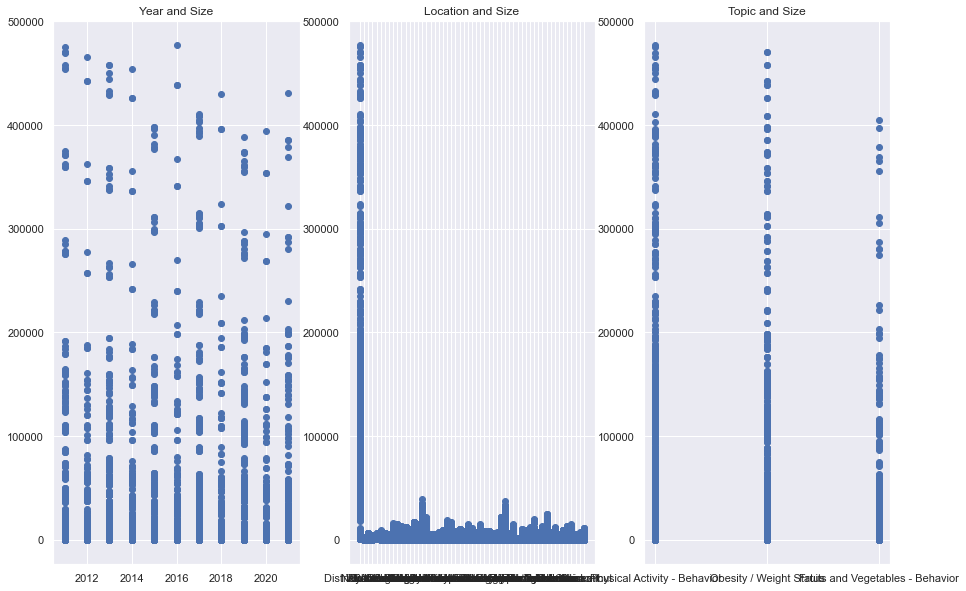

In [127]:
plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['YearStart'], data['Sample_Size'])
plt.title("Year and Size")

plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['LocationDesc'], data['Sample_Size'])
plt.title("Location and Size")

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Topic'], data['Sample_Size'])
plt.title("Topic and Size")

Text(0.5, 1.0, 'Data_Value_Alt and Size')

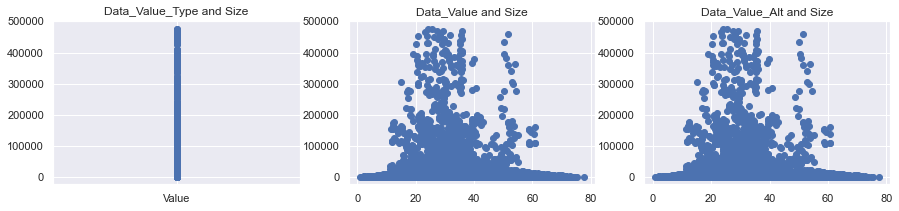

In [128]:
plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Data_Value_Type'], data['Sample_Size'])
plt.title("Data_Value_Type and Size")

plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Data_Value'], data['Sample_Size'])
plt.title("Data_Value and Size")

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Data_Value_Alt'], data['Sample_Size'])
plt.title("Data_Value_Alt and Size")

Text(0.5, 1.0, 'TopicID and Size')

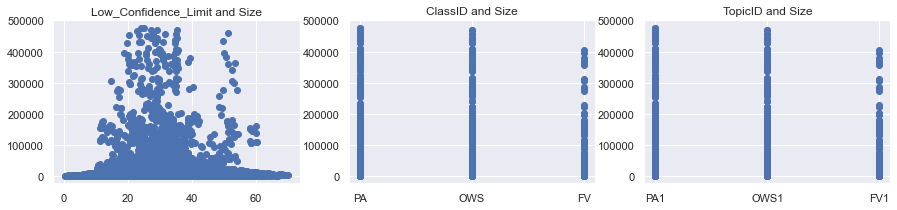

In [129]:
plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['Low_Confidence_Limit'], data['Sample_Size'])
plt.title("Low_Confidence_Limit and Size")

plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['ClassID'], data['Sample_Size'])
plt.title("ClassID and Size")

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['TopicID'], data['Sample_Size'])
plt.title("TopicID and Size")

Text(0.5, 1.0, 'LocationID and Size')

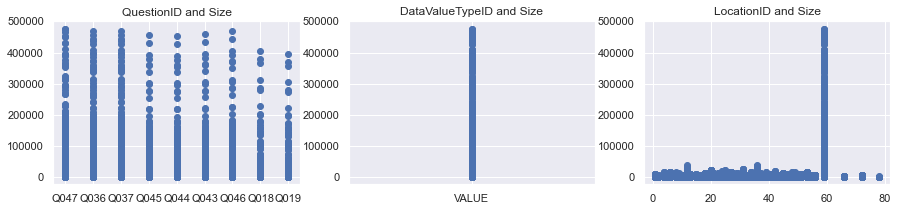

In [130]:
plt.subplot(1,3,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['QuestionID'], data['Sample_Size'])
plt.title("QuestionID and Size")

plt.subplot(1,3,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['DataValueTypeID'], data['Sample_Size'])
plt.title("DataValueTypeID and Size")

plt.subplot(1,3,3)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['LocationID'], data['Sample_Size'])
plt.title("LocationID and Size")

# Creation of Dummy Variables

In [131]:
datanew2 = pd.get_dummies(datanew, drop_first = True)
datanew2.head()

,YearStart,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,...,StratificationID1_MALE,StratificationID1_OVERALL,StratificationID1_RACE2PLUS,StratificationID1_RACEASN,StratificationID1_RACEBLK,StratificationID1_RACEHIS,StratificationID1_RACEHPI,StratificationID1_RACENAA,StratificationID1_RACEOTH,StratificationID1_RACEWHT
0,2014,29.3,29.3,25.7,33.3,842.0,66,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,27.4,27.4,18.6,38.5,125.0,66,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2012,48.5,48.5,32.3,64.9,69.0,56,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,31.6,31.6,24.0,40.4,243.0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,38.1,38.1,32.6,43.8,421.0,72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
datanew2.columns.values

array(['YearStart', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'LocationID', 'LocationDesc_Alaska', 'LocationDesc_Arizona',
       'LocationDesc_Arkansas', 'LocationDesc_California',
       'LocationDesc_Colorado', 'LocationDesc_Connecticut',
       'LocationDesc_Delaware', 'LocationDesc_District of Columbia',
       'LocationDesc_Florida', 'LocationDesc_Georgia',
       'LocationDesc_Guam', 'LocationDesc_Hawaii', 'LocationDesc_Idaho',
       'LocationDesc_Illinois', 'LocationDesc_Indiana',
       'LocationDesc_Iowa', 'LocationDesc_Kansas',
       'LocationDesc_Kentucky', 'LocationDesc_Louisiana',
       'LocationDesc_Maine', 'LocationDesc_Maryland',
       'LocationDesc_Massachusetts', 'LocationDesc_Michigan',
       'LocationDesc_Minnesota', 'LocationDesc_Mississippi',
       'LocationDesc_Missouri', 'LocationDesc_Montana',
       'LocationDesc_Nebraska', 'LocationDesc_Nevada',
       'LocationDesc_New Hampshire', 'L

# Data Scaling

In [133]:
depend = datanew2['Sample_Size']
indep = datanew2.drop(axis =1, columns = ['Sample_Size'])

In [134]:
depend.head()

0    842.0
1    125.0
2     69.0
3    243.0
4    421.0
Name: Sample_Size, dtype: float64

In [135]:
indep.head()

,YearStart,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,LocationDesc_California,...,StratificationID1_MALE,StratificationID1_OVERALL,StratificationID1_RACE2PLUS,StratificationID1_RACEASN,StratificationID1_RACEBLK,StratificationID1_RACEHIS,StratificationID1_RACEHPI,StratificationID1_RACENAA,StratificationID1_RACEOTH,StratificationID1_RACEWHT
0,2014,29.3,29.3,25.7,33.3,66,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,27.4,27.4,18.6,38.5,66,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2012,48.5,48.5,32.3,64.9,56,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,31.6,31.6,24.0,40.4,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,38.1,38.1,32.6,43.8,72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
scaler = StandardScaler()
scaler.fit(indep)
scaled_indep = scaler.transform(indep)
scaled_indep

array([[-0.64048842, -0.19159964, -0.19159964, ..., -0.16322296,
        -0.1131714 , -0.19460908],
       [-0.32053144, -0.37889632, -0.37889632, ..., -0.16322296,
        -0.1131714 , -0.19460908],
       [-1.28040236,  1.70108261,  1.70108261, ...,  6.12658894,
        -0.1131714 , -0.19460908],
       ...,
       [ 1.59921038,  0.60687569,  0.60687569, ..., -0.16322296,
        -0.1131714 , -0.19460908],
       [ 1.59921038, -1.91670064, -1.91670064, ..., -0.16322296,
        -0.1131714 , -0.19460908],
       [ 1.59921038,  0.57730253,  0.57730253, ..., -0.16322296,
        -0.1131714 , -0.19460908]])

# Train Test Modelling

In [137]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_indep, depend, test_size = 0.15, random_state = 365)

# Regression Itself

In [138]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

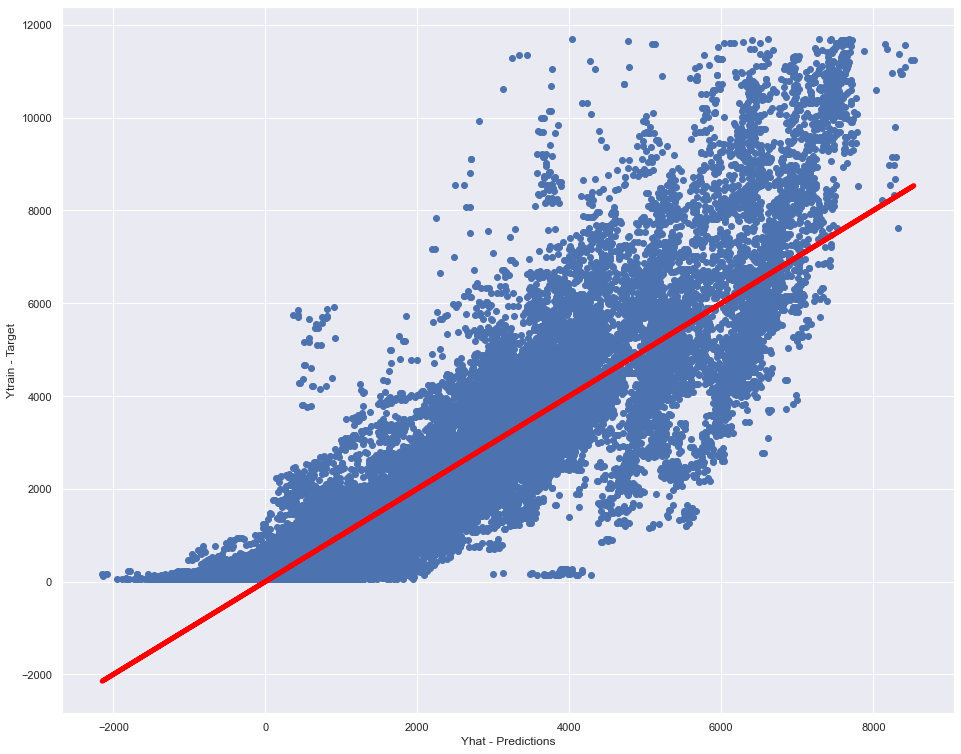

In [139]:
yhat = reg.predict(xtrain)
plt.rcParams["figure.figsize"] = (16,13)
plt.scatter(yhat, ytrain)
plt.xlabel("Yhat - Predictions")
plt.ylabel("Ytrain - Target")
plt.plot(yhat, yhat, color = 'red', linewidth = 5)
plt.show()

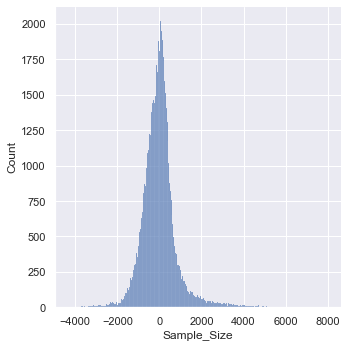

In [140]:
sns.displot(ytrain-yhat)

In [141]:
reg.score(xtrain,ytrain)

0.7971142852471161

In [142]:
reg.intercept_

1743.0885088197526

In [143]:
reg.coef_

array([-1.05973256e+02,  1.05178751e+15, -1.05178751e+15,  1.28076057e+03,
        2.99869096e+02, -1.00272092e+15, -5.29289336e+14, -1.60748511e+15,
        4.12568304e+15,  7.50325074e+15,  5.93407270e+14, -8.56619014e+14,
       -1.65931582e+15, -4.81424446e+14,  2.57786543e+15,  9.92814435e+14,
        8.03072786e+14, -1.80195427e+15,  5.50131040e+14, -1.47334440e+15,
        1.64426345e+15, -1.13115249e+15,  1.88678241e+14,  5.42233664e+15,
        2.26867726e+15, -3.37399155e+15,  1.56642618e+15, -3.59017258e+14,
       -3.32055443e+14, -1.56122830e+15,  1.08636457e+15,  1.98295267e+15,
       -1.74281952e+15,  4.64342404e+15, -1.97567995e+15,  7.70759370e+14,
        2.71765694e+15,  4.19378856e+14, -2.44207587e+15, -1.15643417e+15,
       -1.82620165e+15, -3.93895979e+14, -4.73142545e+14, -9.26921656e+14,
        2.12427226e+15,  7.53987400e+14,  2.63777238e+15, -5.07467629e+15,
        9.62915106e+13,  3.19279600e+14,  4.77256541e+15, -4.20671921e+15,
        5.26082960e+14, -

In [144]:
table = pd.DataFrame(indep.columns.values, columns = ['Features'])
table['Weights'] = reg.coef_
table['Intercept'] = reg.intercept_
table['R2'] = reg.score(xtrain, ytrain)
table

,Features,Weights,Intercept,R2
0,YearStart,-1.059733e+02,1743.088509,0.797114
1,Data_Value,1.051788e+15,1743.088509,0.797114
2,Data_Value_Alt,-1.051788e+15,1743.088509,0.797114
3,Low_Confidence_Limit,1.280761e+03,1743.088509,0.797114
4,High_Confidence_Limit,2.998691e+02,1743.088509,0.797114
...,...,...,...,...
244,StratificationID1_RACEHIS,2.488421e+15,1743.088509,0.797114
245,StratificationID1_RACEHPI,2.903685e+14,1743.088509,0.797114
246,StratificationID1_RACENAA,-1.258427e+15,1743.088509,0.797114
247,StratificationID1_RACEOTH,-8.622554e+13,1743.088509,0.797114


# Testing the model

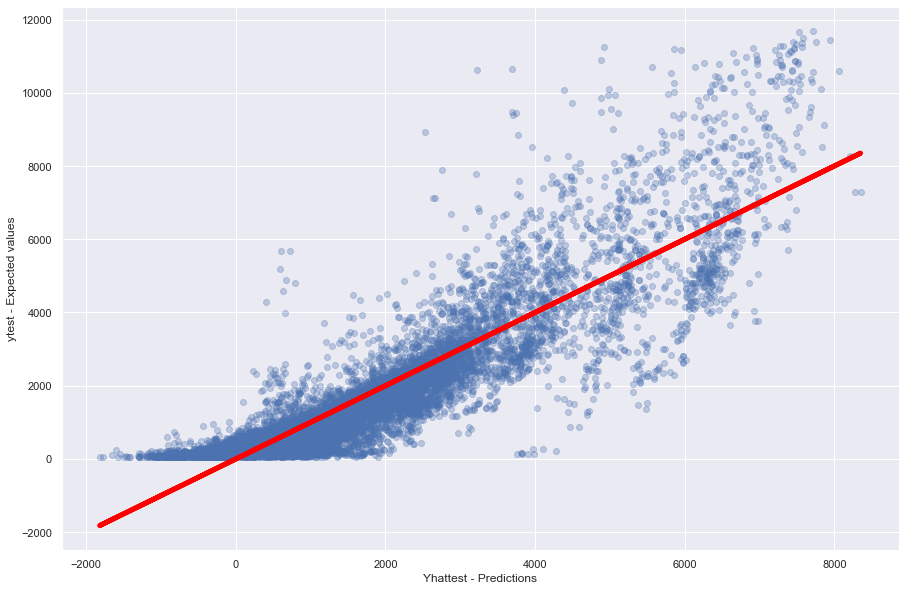

In [145]:
yhattest = reg.predict(xtest)
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(yhattest, ytest, alpha = 0.3)
plt.xlabel("Yhattest - Predictions")
plt.ylabel("ytest - Expected values")
plt.plot(yhattest, yhattest, color = 'red', linewidth = 5)
plt.show()

In [146]:
testdf = pd.DataFrame(yhattest, columns = ['Prediction'])
testdf.head()

,Prediction
0,185.088509
1,1392.651009
2,501.088509
3,2052.401009
4,1603.088509


In [147]:
ytest.reset_index(drop = True, inplace = True)
testdf['Expected- Target'] = ytest
testdf.head(15)

,Prediction,Expected- Target
0,185.088509,570.0
1,1392.651009,200.0
2,501.088509,628.0
3,2052.401009,1642.0
4,1603.088509,1245.0
5,1215.088509,1241.0
6,183.088509,559.0
7,422.088509,307.0
8,-274.411491,132.0
9,-310.911491,86.0


In [148]:
testdf['Difference'] = testdf['Expected- Target'] - testdf['Prediction']
testdf['% Difference'] = np.absolute((testdf['Expected- Target'] - testdf['Prediction'])*100/(testdf['Expected- Target']))
testdf.head()

,Prediction,Expected- Target,Difference,% Difference
0,185.088509,570.0,384.911491,67.528332
1,1392.651009,200.0,-1192.651009,596.325504
2,501.088509,628.0,126.911491,20.208836
3,2052.401009,1642.0,-410.401009,24.993971
4,1603.088509,1245.0,-358.088509,28.762129


In [149]:
pd.options.display.max_rows = 50
testdf.sort_values(by = ["% Difference"], inplace = True)
testdf.head()

,Prediction,Expected- Target,Difference,% Difference
7816,1729.088509,1729.0,-0.088509,0.005119
2346,1447.088509,1447.0,-0.088509,0.006117
8389,1049.088509,1049.0,-0.088509,0.008437
4580,971.088509,971.0,-0.088509,0.009115
2675,865.088509,865.0,-0.088509,0.010232


In [150]:
testdf.describe()

,Prediction,Expected- Target,Difference,% Difference
count,11613.000000,11613.000000,11613.000000,11613.000000
mean,1746.098617,1736.668475,-9.430142,117.220157
std,1733.692179,1918.355305,875.916411,268.890056
min,-1819.911491,50.000000,-4134.588509,0.005119
25%,523.088509,501.000000,-462.088509,13.727791
50%,1371.088509,1058.000000,-27.088509,31.893400
75%,2504.088509,2240.000000,315.911491,79.021825
max,8351.088509,11676.000000,7391.911491,3668.453904
